# **Tame Your Python**

Reference: https://pythonmachinelearning.pro/


In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf
print(tf.__version__)

2.2.0


In [0]:
import matplotlib.pyplot as plt
from sklearn.datasets import fetch_lfw_people

In [3]:
# Load data
dataset = fetch_lfw_people(min_faces_per_person=100)
 
N, H, W = dataset.images.shape
X = dataset.data
y = dataset.target
target_names = dataset.target_names

In [4]:
print(target_names)

['Colin Powell' 'Donald Rumsfeld' 'George W Bush' 'Gerhard Schroeder'
 'Tony Blair']


In [5]:
print(dataset.images.shape)
print(dataset.data.shape)
print(dataset.target.shape)

(1140, 62, 47)
(1140, 2914)
(1140,)


In [6]:
print(H*W)

2914


In [0]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1)

In [0]:
from sklearn.decomposition import KernelPCA
n_components = 80
pca = KernelPCA(n_components=n_components, kernel="poly").fit(X_train)

X_train_pca = pca.transform(X_train)
X_test_pca = pca.transform(X_test)

In [12]:
from sklearn.neural_network import MLPClassifier
model = MLPClassifier (hidden_layer_sizes=(1024,), batch_size=256, verbose=True, early_stopping=True)
model.fit(X_train_pca, y_train)

Iteration 1, loss = inf
Validation score: 0.631068
Iteration 2, loss = inf
Validation score: 0.679612
Iteration 3, loss = inf
Validation score: 0.776699
Iteration 4, loss = inf
Validation score: 0.786408
Iteration 5, loss = inf
Validation score: 0.805825
Iteration 6, loss = inf
Validation score: 0.844660
Iteration 7, loss = inf
Validation score: 0.815534
Iteration 8, loss = inf
Validation score: 0.815534
Iteration 9, loss = inf
Validation score: 0.805825
Iteration 10, loss = inf
Validation score: 0.834951
Iteration 11, loss = inf
Validation score: 0.844660
Iteration 12, loss = inf
Validation score: 0.825243
Iteration 13, loss = inf
Validation score: 0.834951
Iteration 14, loss = inf
Validation score: 0.834951
Iteration 15, loss = inf
Validation score: 0.834951
Iteration 16, loss = inf
Validation score: 0.825243
Iteration 17, loss = 0.00003519
Validation score: 0.825243
Validation score did not improve more than tol=0.000100 for 10 consecutive epochs. Stopping.


MLPClassifier(activation='relu', alpha=0.0001, batch_size=256, beta_1=0.9,
              beta_2=0.999, early_stopping=True, epsilon=1e-08,
              hidden_layer_sizes=(1024,), learning_rate='constant',
              learning_rate_init=0.001, max_fun=15000, max_iter=200,
              momentum=0.9, n_iter_no_change=10, nesterovs_momentum=True,
              power_t=0.5, random_state=None, shuffle=True, solver='adam',
              tol=0.0001, validation_fraction=0.1, verbose=True,
              warm_start=False)

In [0]:
y_pred = model.predict(X_test_pca)

In [14]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred, target_names=target_names))

                   precision    recall  f1-score   support

     Colin Powell       0.95      0.84      0.89        25
  Donald Rumsfeld       0.62      0.83      0.71         6
    George W Bush       0.89      0.89      0.89        54
Gerhard Schroeder       0.69      0.75      0.72        12
       Tony Blair       0.71      0.71      0.71        17

         accuracy                           0.83       114
        macro avg       0.77      0.80      0.78       114
     weighted avg       0.84      0.83      0.84       114



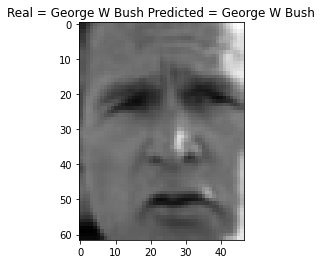

In [15]:
idx = np.random.randint(0,len(y_pred))
plt.figure()
plt.imshow(X_test[idx].reshape((H,W)), cmap = 'gray')
plt.title("Real = " + str(target_names[y_test[idx]]) + " Predicted = " + str(target_names[y_pred[idx]]))
plt.show()